<a href="https://colab.research.google.com/github/Jeyakumar30/Movie-Rating-Prediction/blob/main/Movie_Rating_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Movie Rating Prediction with Python***


#**Introduction**


Welcome to the Movie Rating Prediction Project! This project explores the exciting world of movies, aiming to predict how audiences might rate a film based on factors like genres, directors, and actors.

Movies are a universal form of entertainment, and understanding what influences their ratings can provide valuable insights for filmmakers. This project dives into the factors that contribute to a movie's success.

#**Data Science Process**

#I. Setting the Research Goal

##**Research Goal:**

To analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.


**Key Objectives:**

1. Preprocessing
2. Feature Importance
3. Exploratory Data Analysis
4. Predictive Modeling
5. Model Evaluation
6. Interpretation of results

#II. Data Retrieval


The dataset for this analysis was sourced from Kaggle, a platform known for hosting diverse datasets and fostering collaborative data science projects. The dataset, titled "IMDb India Movies" encapsulates information about all Indian movies from IMDb in one place.

The dataset consist of a file: "IMDb Movies India.csv". The CSV file is composed of the following attributes: Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3.


Subsequently, the data was imported into a Google Colab Notebook environment for analysis, visualizations, and insights into the exploration of Movie Rating Prediction with Python.

###Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from joblib import dump, load

###Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMDb = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin1')
IMDb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
display(IMDb)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
IMDb.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

###Understanding Data


1. **Name:** The name or title of the movie.
  
2. **Year:** The year when the movie was released.
  
3. **Duration:** The duration of the movie in minutes.
  
4. **Genre:** The genre or category to which the movie belongs (e.g., Action, Drama, Comedy).
  
5. **Rating:** The rating assigned to the movie, indicating its overall quality or reception.
  
6. **Votes:** The number of votes or ratings that the movie has received.
  
7. **Director:** The name of the director who directed the movie.
  
8. **Actor 1:** The name of the first actor associated with the movie.
  
9. **Actor 2:** The name of the second actor associated with the movie.
  
10. **Actor 3:** The name of the third actor associated with the movie.

#III. Data Preparation

In [ ]:
IMDb.shape

(15509, 10)

##1. Data Cleansing

###Handling Missing Values

 Let us check the total number of missing values in each column.

In [ ]:
# Checking for missing values in the entire dataset
print(IMDb.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


Let us handle the missing values with the measures of central tendency [Mean, Median, Mode]

Mean and Median for Numerical attributes and Mode for Categorical attributes

Let us remove parenthesis surrounded by *Year* attribute and 'min' string  present in *Duration* attribute and then convert them into a interger datatype.


In [ ]:
for feature in ['Year', 'Duration']:
    IMDb[feature] = IMDb[feature].replace(r'\D', '', regex=True)

    # Convert the 'Year' and 'Duration' column to numeric type (Casted as a floating-point variable)
    IMDb[feature] = pd.to_numeric(IMDb[feature], errors='coerce')

    # Converting columns to integer type
    IMDb[feature] = IMDb[feature].astype('Int64')

    # Filling missing values in 'Year' and 'Duration' with the median value
    IMDb[feature].fillna(IMDb[feature].median(), inplace=True)


Let us rename the **'Duration'** column name to **'Duration_in_min'** just to indicate that they are in Minutes (Time Duration of movie)

In [ ]:
IMDb.rename(columns={'Duration': 'Duration_in_min'}, inplace=True)

Let us fill NA in 'Rating' and 'Votes' attribute with Mean Value

In [ ]:
# Convert the 'Votes' column to numeric type
IMDb['Votes'] = pd.to_numeric(IMDb['Votes'], errors='coerce')

#Filling missing values present in 'Rating' and 'Votes' attribute with Mean Value
for feature in ['Rating', 'Votes']:
  IMDb[feature].fillna(IMDb[feature].mean(), inplace=True)

Filling most frequent Actor name for **Actor 2** in missing fields

In [ ]:
IMDb['Actor 2'].fillna(IMDb['Actor 2'].mode()[0], inplace=True)

Dropping rows of 'Genre', 'Director' and 'Actor 1' where ever the null values are present.

In [ ]:
for feature in ['Genre', 'Director', 'Actor 1']:
  IMDb.dropna(subset=[feature], inplace=True)

In [ ]:
print(IMDb.isnull().sum())

Name                  0
Year                  0
Duration_in_min       0
Genre                 0
Rating                0
Votes                 0
Director              0
Actor 1               0
Actor 2               0
Actor 3            1039
dtype: int64


Now, the data cleaning is over. Let's move on to the next step of data processing.

##2. Data Transformation

###Reducing Number of variables

Let us remove the variables that are not needed for our analysis and making prediction.

The following columns are not required:

1. Actor 3 (It does not affect our analysis significantly)
2. Name

Let's try to remove them





In [ ]:
# Droping the 'Actor 3' and 'Name' columns
IMDb.drop(['Actor 3', 'Name'], axis=1, inplace=True)

In [ ]:
IMDb.tail()

,Year,Duration_in_min,Genre,Rating,Votes,Director,Actor 1,Actor 2
15503,1989,125,"Action, Crime, Drama",5.800000,44.000000,S.P. Muthuraman,Chiranjeevi,Jayamalini
15504,1988,131,Action,4.600000,11.000000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal
15505,1999,129,"Action, Drama",4.500000,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna
15506,2005,131,Action,5.841621,120.839493,Kiran Thej,Sangeeta Tiwari,Rekha
15508,1998,130,"Action, Drama",6.200000,20.000000,K.C. Bokadia,Dharmendra,Jaya Prada


Removing duplicate entries.

In [ ]:
IMDb.drop_duplicates()

,Year,Duration_in_min,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,1991,131,Drama,5.841621,120.839493,J.S. Randhawa,Manmauji,Birbal
1,2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,2021,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj
4,2010,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta
...,...,...,...,...,...,...,...,...
15503,1989,125,"Action, Crime, Drama",5.800000,44.000000,S.P. Muthuraman,Chiranjeevi,Jayamalini
15504,1988,131,Action,4.600000,11.000000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal
15505,1999,129,"Action, Drama",4.500000,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna
15506,2005,131,Action,5.841621,120.839493,Kiran Thej,Sangeeta Tiwari,Rekha


Final shape of our IMDb dataset

In [ ]:
IMDb.shape

(12407, 8)

#IV. Data Exploration

###Descriptive Statistical Analysis

Let us perform descriptive statistical analysis on our dataset for measuring Central tendency, Spread/dispersion and Shape of distribution using `describe()` function.

In [ ]:
print(IMDb.describe())

              Year  Duration_in_min        Rating         Votes
count      12407.0          12407.0  12407.000000  12407.000000
mean   1992.005884       130.052873      5.830017    122.394984
std      21.458992        20.571998      1.082952    140.255562
min         1917.0             21.0      1.100000      5.000000
25%         1978.0            129.0      5.600000     35.000000
50%         1994.0            131.0      5.841621    120.839493
75%         2010.0            135.0      6.300000    120.839493
max         2022.0            321.0     10.000000    999.000000


Grouping IMDb dataset by **Genre**

In [ ]:
IMDb.groupby(['Genre']).count()

,Year,Duration_in_min,Rating,Votes,Director,Actor 1,Actor 2
Genre,,,,,,,
Action,1207,1207,1207,1207,1207,1207,1207
"Action, Adventure",40,40,40,40,40,40,40
"Action, Adventure, Biography",1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,42,42,42,42,42,42
"Action, Adventure, Crime",19,19,19,19,19,19,19
...,...,...,...,...,...,...,...
"Thriller, Action",2,2,2,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1
"Thriller, Mystery",3,3,3,3,3,3,3


Getting the count of movies directed by each **Director**

In [ ]:
IMDb["Director"].value_counts()

Director
Kanti Shah              51
Mahesh Bhatt            47
David Dhawan            43
Hrishikesh Mukherjee    42
B.R. Ishara             40
                        ..
Jitendra Kumar Singh     1
Satyabhan Sinha          1
Partho Sen-Gupta         1
Sudarshan Babbar         1
Kiran Thej               1
Name: count, Length: 5230, dtype: int64

###Visualizations
Using visualizations to understand the distribution of features and relationships between them by creating various techniques like histograms, scatter plots, count plots, etc.

Let us plot histogram to find the distribution of numerical attributes in our IMDb dataset.

Numerical Columns:
1. 'Year',
2. 'Duration_in_min',
3. 'Rating',
4. 'Votes'

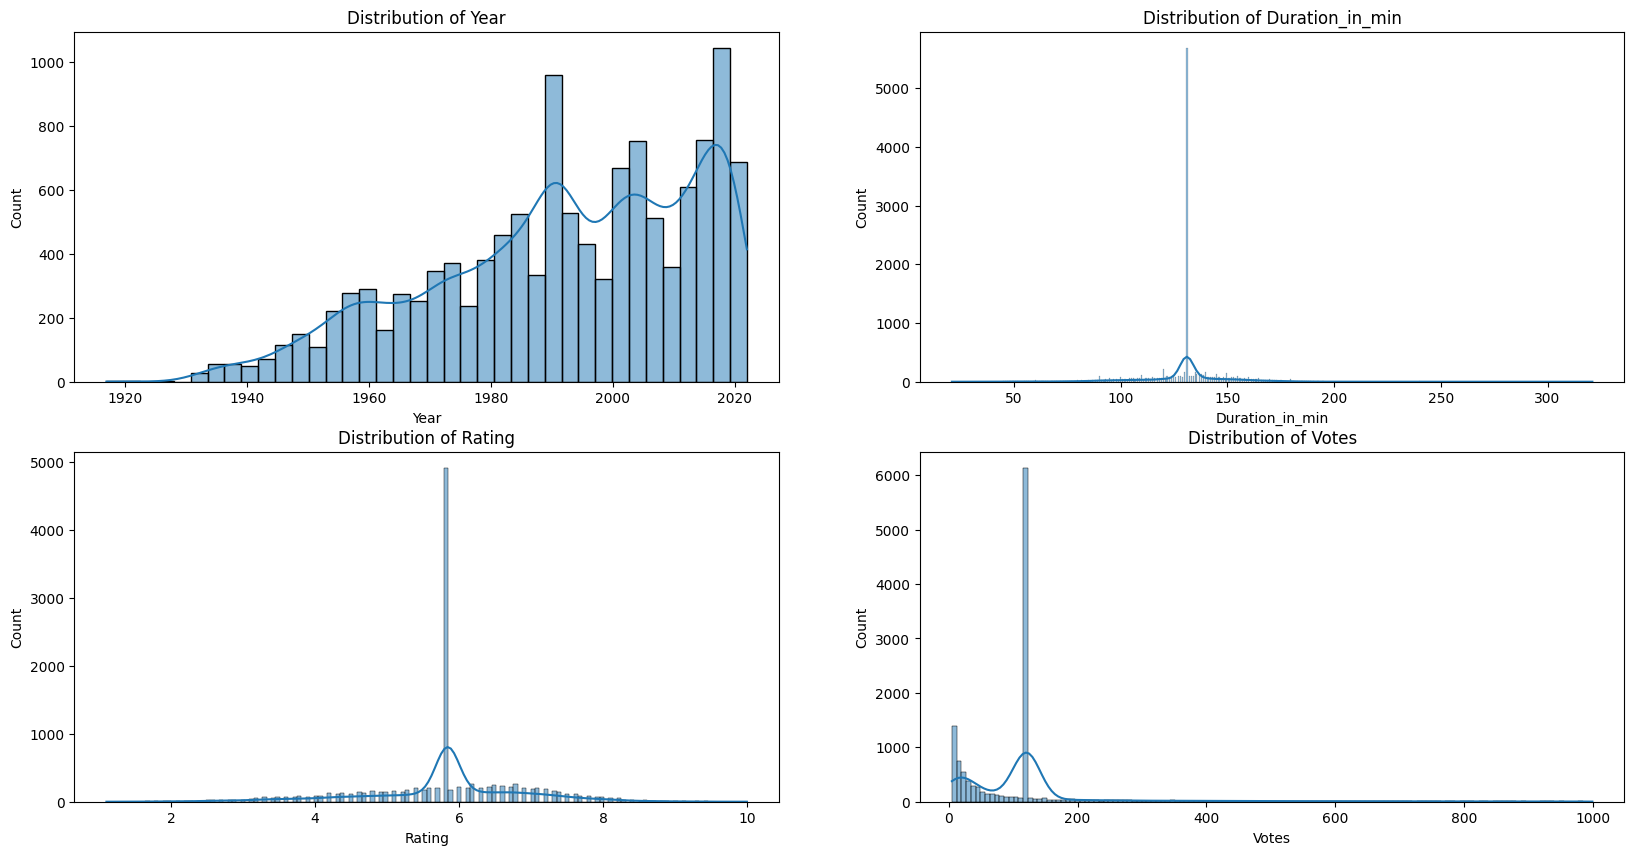

In [ ]:
plt.figure(figsize=(20, 10))
i = 1

for feature in ['Year', 'Duration_in_min', 'Rating', 'Votes']:
    plt.subplot(2, 2, i)
    sns.histplot(IMDb[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    i += 1

plt.show()


Pair plot to visualize the pair wise relationship between variables.

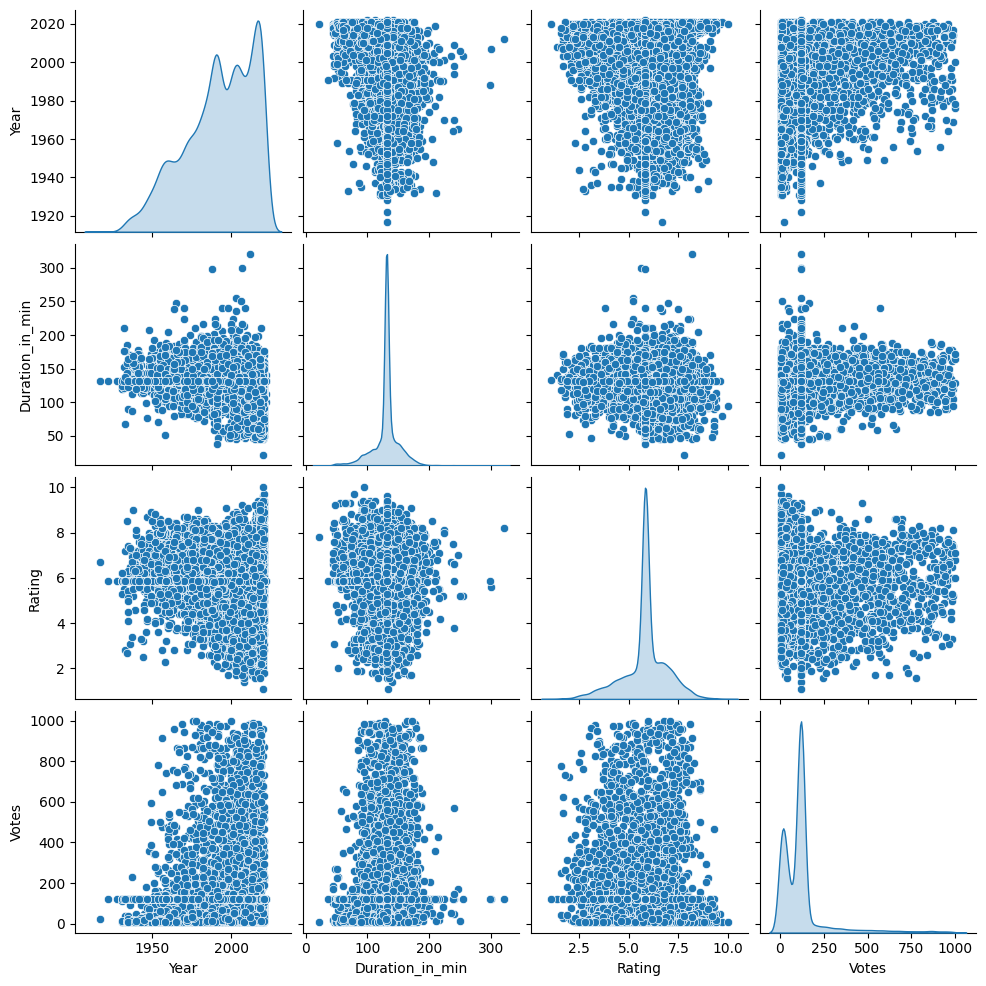

In [ ]:
sns.pairplot(IMDb, diag_kind='kde')
plt.show()

To explore the correlation between features, a correlation matrix can be used which will give us an idea of how different features are related.

In [ ]:
IMDb

,Year,Duration_in_min,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,1991,131,Drama,5.841621,120.839493,J.S. Randhawa,Manmauji,Birbal
1,2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,2021,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj
4,2010,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta
...,...,...,...,...,...,...,...,...
15503,1989,125,"Action, Crime, Drama",5.800000,44.000000,S.P. Muthuraman,Chiranjeevi,Jayamalini
15504,1988,131,Action,4.600000,11.000000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal
15505,1999,129,"Action, Drama",4.500000,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna
15506,2005,131,Action,5.841621,120.839493,Kiran Thej,Sangeeta Tiwari,Rekha


In [ ]:
col = IMDb.columns.tolist()

li = [] #Numerical Columns
li.append(col[1])
li.append(col[3])
li.append(col[4])
li

['Duration_in_min', 'Rating', 'Votes']

In [ ]:
correlation = IMDb[li].corr()
print(correlation)

                 Duration_in_min    Rating     Votes
Duration_in_min         1.000000 -0.008747  0.063609
Rating                 -0.008747  1.000000 -0.004276
Votes                   0.063609 -0.004276  1.000000


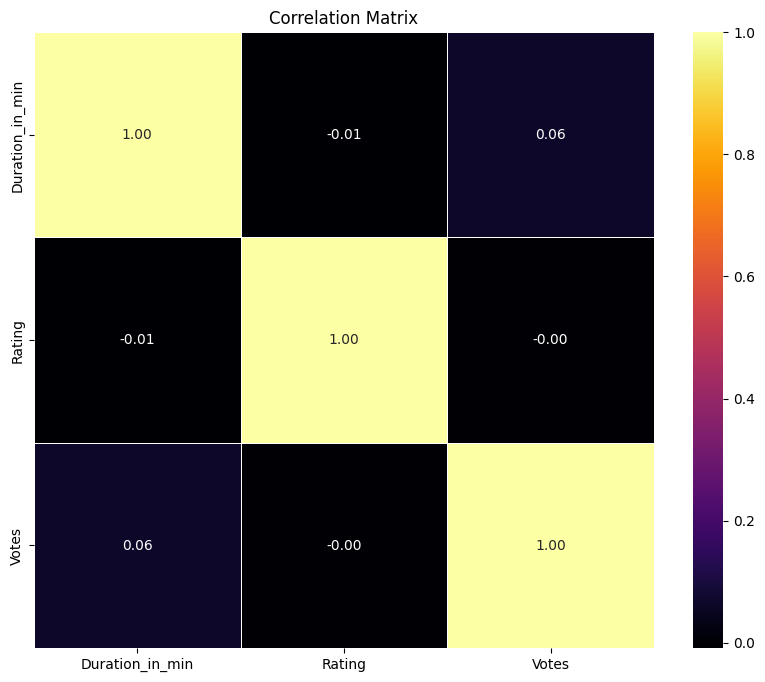

In [ ]:
# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Let us use linear regression to predict the movie rating based on historical data. But, we have some attributes with String datatype. We need to handle them separately by employing Feature Engineering.

**Example:**

For Genre Mean Rating:

1. The following code snippet calculates the mean rating for each genre in the 'Genre' column.
2. The groupby('Genre')['Rating'].transform('mean') part groups the data by 'Genre' and computes the mean rating for each group.
3. The above step results with a new Series with the mean rating for each movie's respective genre.
4. This new feature is named 'Genre_mean_rating' and is added to the IMDb DataFrame.

These 4 steps are applicable for other attributes like Director, Actor 1, Actor 2.

In [ ]:
#Feature Engineering on IMDb dataset
def featureEngineering(IMDb):
  genre_mean_rating = IMDb.groupby('Genre')['Rating'].transform('mean')
  IMDb['Genre_mean_rating'] = genre_mean_rating

  director_mean_rating = IMDb.groupby('Director')['Rating'].transform('mean')
  IMDb['Director_encoded'] = director_mean_rating

  actor1_mean_rating = IMDb.groupby('Actor 1')['Rating'].transform('mean')
  IMDb['Actor1_encoded'] = actor1_mean_rating

  actor2_mean_rating = IMDb.groupby('Actor 2')['Rating'].transform('mean')
  IMDb['Actor2_encoded'] = actor2_mean_rating

featureEngineering(IMDb)

These new features aim to capture the average rating associated with certain genres, directors, and actors.

In [ ]:
IMDb.head()

,Year,Duration_in_min,Genre,Rating,Votes,Director,Actor 1,Actor 2,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded
0,1991,131,Drama,5.841621,120.839493,J.S. Randhawa,Manmauji,Birbal,6.085268,5.770811,5.841621,5.544262
1,2019,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,6.085268,7.000000,6.850000,7.000000
2,2021,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,6.350427,5.841621,6.420811,6.847207
3,2019,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,5.738783,4.400000,5.420000,4.400000
4,2010,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,6.085268,6.263089,6.806937,5.764805


In [ ]:
IMDb.columns

Index(['Year', 'Duration_in_min', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded'],
      dtype='object')

#V. Data Modeling

The next few steps in this phase are crucial for building a predictive model and it involves preparing the data for model training, selecting a model, training the model, and evaluating its performance.

##1. Model Selection and Execution

Let `X` be the new dataframe which comprises of independent variables and `y` be the dependent or target variable of our `IMDb`.

In [ ]:
# Defining features (X) and target variable (y)
ind_var = [ 'Year', 'Duration_in_min', 'Votes', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded']
X = IMDb[ind_var]
y = IMDb['Rating']

Let us split the dataset into Train and Test sets in 80 : 20 ratio.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let us use different regression models(for prediction of continuous value) and train them with our data. Finally, will choose one best performing model among them.

###1. Multiple Linear Regression

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, linear.predict(X_train))
train_r2 = r2_score(y_train, linear.predict(X_train))

print('Model: Linear Regression\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Linear Regression

Training Mean Squared Error: 0.3722605670239968
Training R-squared: 0.6833624257049812

Test Mean Squared Error: 0.38163885427498706
Test R-squared: 0.6712118092534562


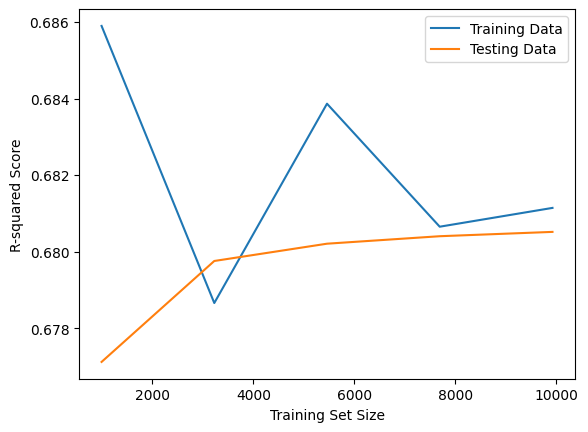

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(linear, X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Data')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Data')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()


###2. Random Forest Regressor

In [ ]:
# Initializing and Training the RandomForest model
randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)

# Making predictions on the test set
y_pred_random = randomForest.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, randomForest.predict(X_train))
train_r2 = r2_score(y_train, randomForest.predict(X_train))

print('Model: Random Forest Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_random)
test_r2 = r2_score(y_test, y_pred_random)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Random Forest Regressor

Training Mean Squared Error: 0.04486238614318421
Training R-squared: 0.961840929757815

Test Mean Squared Error: 0.3285231406885322
Test R-squared: 0.7169718758050624


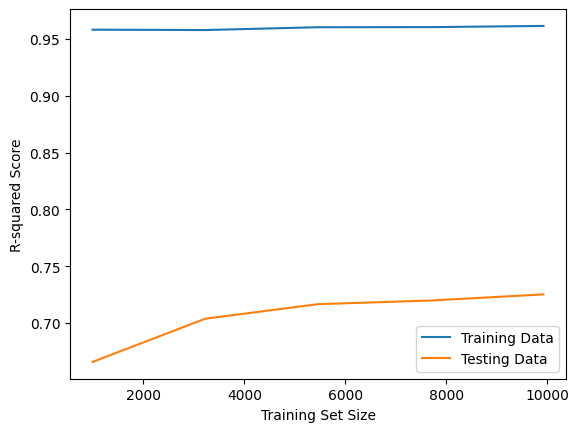

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(randomForest, X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Data')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Data')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()


###3. Decision Tree Regressor

In [ ]:
# Initializing and Training the Decision Trees model
decisionTree = DecisionTreeRegressor(random_state=42)
decisionTree.fit(X_train, y_train)

# Making predictions on the test set
y_pred_decisionTree = decisionTree.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, decisionTree.predict(X_train))
train_r2 = r2_score(y_train, decisionTree.predict(X_train))

print('Model: Decision Tree Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_decisionTree )
test_r2 = r2_score(y_test, y_pred_decisionTree )

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Decision Tree Regressor

Training Mean Squared Error: 5.711790185421246e-27
Training R-squared: 1.0

Test Mean Squared Error: 0.6259181387002642
Test R-squared: 0.46076116183280347


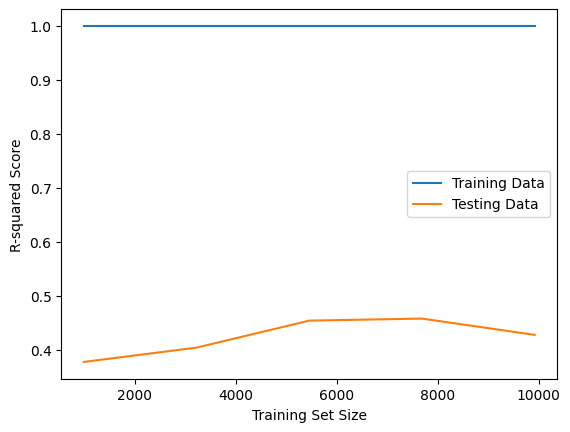

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(decisionTree, X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Data')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Data')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()


###4. Gradient Boosting Regressor

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the Gaussian Naive Bayes model
gBoost = GradientBoostingRegressor()
gBoost.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gBoost = gBoost.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, gBoost.predict(X_train))
train_r2 = r2_score(y_train, gBoost.predict(X_train))

print('Model: Gradient Boosting Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_gBoost)
test_r2 = r2_score(y_test, y_pred_gBoost)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Gradient Boosting Regressor

Training Mean Squared Error: 0.29767773653987123
Training R-squared: 0.7468011259609441

Test Mean Squared Error: 0.3410850189027589
Test R-squared: 0.7061496097695972


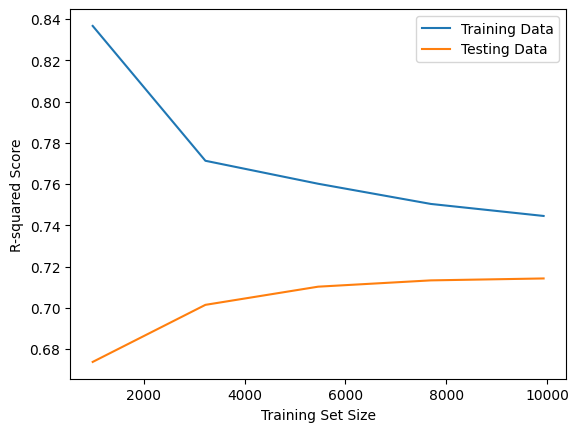

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gBoost, X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Data')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Data')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()


###5. K-Nearest Neighbors Regressor

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the K-Nearest Neighbors (KNN) model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, knn.predict(X_train))
train_r2 = r2_score(y_train, knn.predict(X_train))

print('Model: K-Nearest Neighbors Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_knn)
test_r2 = r2_score(y_test, y_pred_knn)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: K-Nearest Neighbors Regressor

Training Mean Squared Error: 0.5217129601734196
Training R-squared: 0.5562411363948292

Test Mean Squared Error: 0.7989362238332062
Test R-squared: 0.3117032172863542


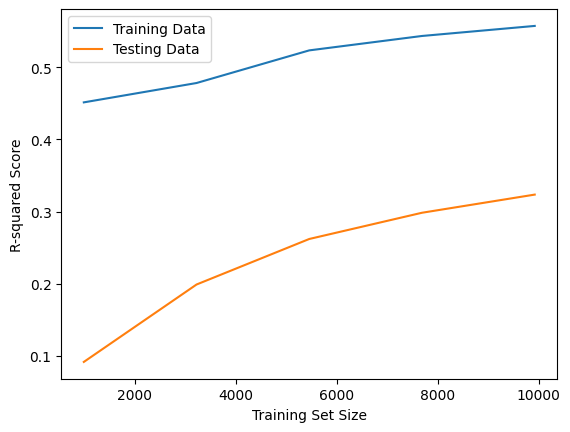

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Data')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Data')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()


##2. Model Diagnostic and Comparison

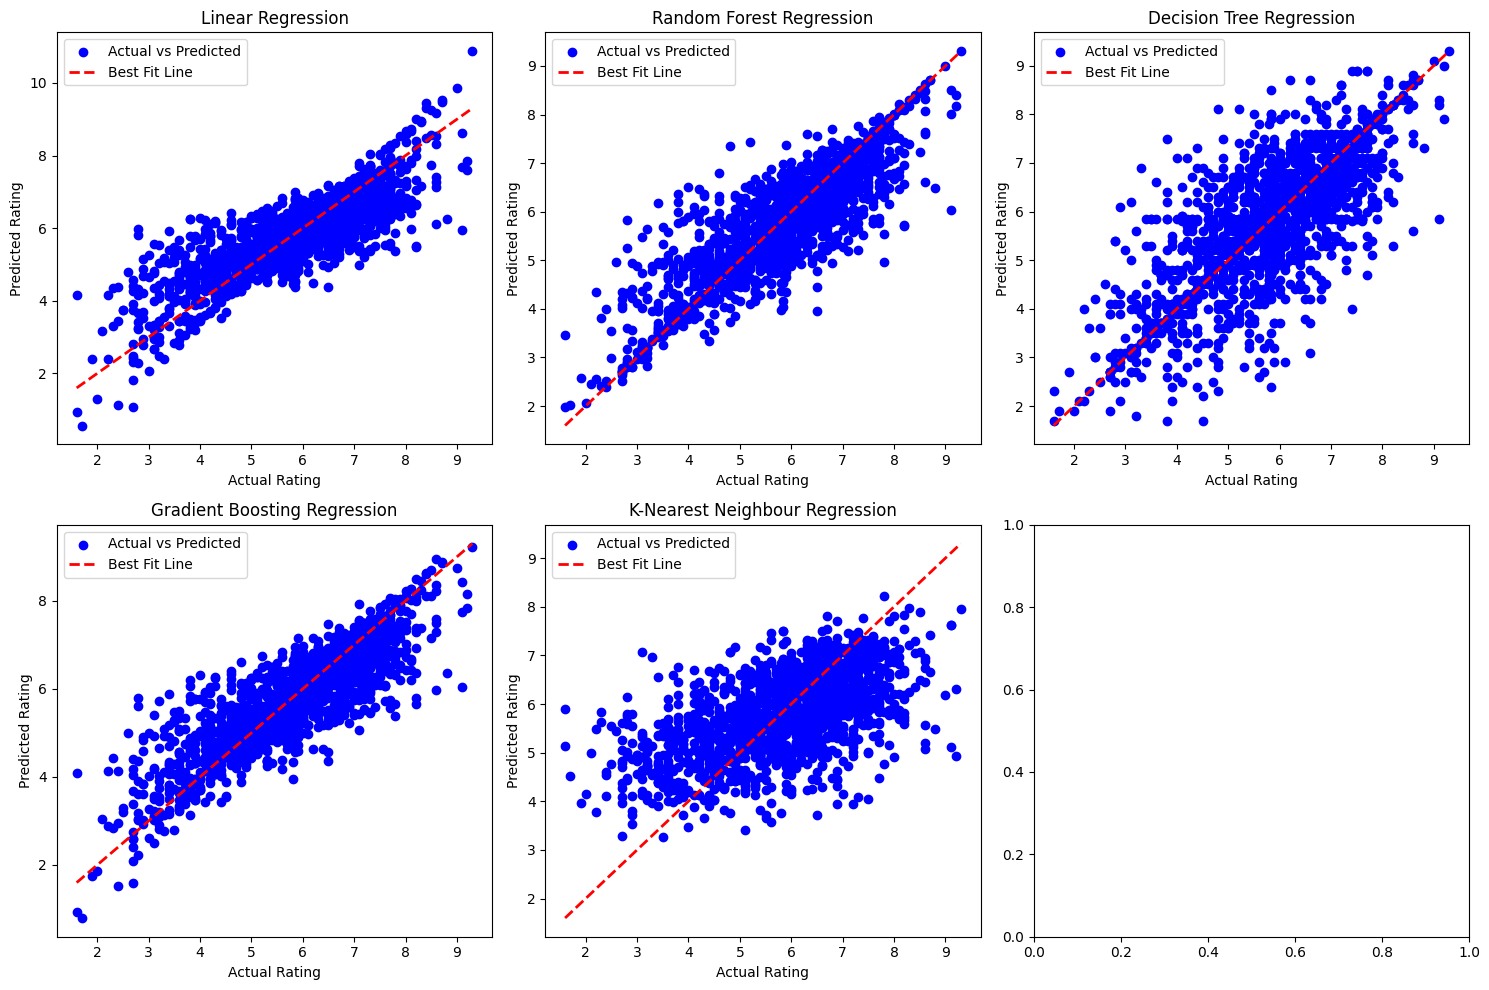

In [ ]:
def plot_best_fit_line_subplot(y_test, y_pred, model_name, ax):
    ax.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Best Fit Line')
    ax.set_xlabel('Actual Rating')
    ax.set_ylabel('Predicted Rating')
    ax.set_title(model_name)
    ax.legend()

# Example use case:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Linear Regression
plot_best_fit_line_subplot(y_test, y_pred, 'Linear Regression', axes[0, 0])

# Random Forest Regression
plot_best_fit_line_subplot(y_test, y_pred_random, 'Random Forest Regression', axes[0, 1])

# Decision Tree Regression
plot_best_fit_line_subplot(y_test, y_pred_decisionTree, 'Decision Tree Regression', axes[0, 2])

# Gradient Boosting Regression
plot_best_fit_line_subplot(y_test, y_pred_gBoost, 'Gradient Boosting Regression', axes[1, 0])

# K-Nearest Neighbour Regression
plot_best_fit_line_subplot(y_test, y_pred_knn, 'K-Nearest Neighbour Regression', axes[1, 1])

plt.tight_layout()
plt.show()


#VI. Automation and Presentation

##Automation

From the above comparisons between trained models, the best performing models are
1. Random Forest Regression &
2. Gradient Boosting Regression model

I selected Random Forest Regression model for automation.

In [ ]:
def make_predictions(new_data):
    predictions = randomForest.predict(new_data)
    predictions = pd.DataFrame({
      'Random Forest': predictions
  })
    return predictions

# Sample data for testing

new_data = pd.DataFrame({
    'Year' : [2021, 2020, 2012, 2021, 2023] ,
    'Duration_in_min' : [130, 150, 120, 90, 180],
    'Genre' : ['Action, Drama, Comedy', "Drama", "Action", "Drama, Musical", "Action, Drama"],
    'Rating' : [4.25, 5.86, 7.28, 6.63, 4.9],
    'Votes' : [120, 48, 29, 100, 67],
    'Director' : ["Amol Palekar","Ovais","Aarthi Agarwal","A.R. Murugadoss","A. Shamsheer"],
    'Actor 1' : ["Ramesh", "Suresh", "Amitabh Bachchan", "Thuppaki", "Deva"],
    'Actor 2' : ["Kajol", "Ishita Raj", "Trisha", "Kajal Aggarwal", "Birbal"],
})

featureEngineering(new_data)

predictions = make_predictions(new_data[ind_var])

print("\nRating Result:")
print(predictions)


Rating Result:
   Random Forest
0       3.783000
1       5.990330
2       7.402416
3       6.665324
4       4.724665


In [ ]:
# Save the model
dump(randomForest, 'MovieRatingPredictive_model.joblib')

# Load the model for predictions
loaded_model = load('MovieRatingPredictive_model.joblib')
new_predictions = loaded_model.predict(new_data[ind_var])
new_predictions

array([3.783     , 5.99032971, 7.40241621, 6.66532428, 4.72466486])

##Presentation

I used Google Colab to create presentations, which provide an interactive way to share findings. I incorporated code, visualizations, and explanations within the analyses.

#**Conclusion**


In conclusion, this Movie Rating predictions project aimed to predict rating using machine learning techniques, and several regression models were explored and evaluated, including Linear Regression, Random Forest Regressor, Decision Tree Regressor, Support Vector Regressor, Gradient Boosting Regressor, and K-Nearest Neighbors Regressor.

**Key takeaways:**

*Random Forest Regressor* and *Gradient Boosting Regressor* stood out with high R-squared values on both training and test sets, indicating good predictive performance
